# Simple computations

There are few (but some) surprises when doing simple computations in Julia.

In [1]:
1 + 3

4

A nifty feature is that you can use unicode characters in variable names.  In a notebook, these can be typed in $\LaTeX$ notation, after you press the tab key, they will be converted into unicode.

In [2]:
β = 3.1

3.1

Note that like MATLAB, Julia will print the result of a statement, unless you end it with a semi-colon.

In [3]:
β = 3.3;

The type of a value can be determined using the `typeof` function.  By default, floating piont valies are double precision (64 bit).

In [4]:
typeof(β)

Float64

To create a single precision floating point value, you would use the following notation.

In [5]:
typeof(3.1f0)

Float32

Note that unlike in C/C++, you have to specify the exponent, so the `f` is not a type qualifier, it is simply denoting the exponent part of the floating point number (`e` for double precision, `f` for single precision).

You can explicitely create a value of the type you want using the conversion functions, e.g., an 8-bit integer value.

In [6]:
bits = Int8(3)

3

In [7]:
typeof(bits)

Int8

Julia has made a halfhearted attempt at being smart at math.  When you multiply a constant value and a variable, you don't have to use the multiplication operator, it is implicit.

In [8]:
3β

9.899999999999999

Some functions also have a representation as a unicode symbol, for instance the square root function (`\sqrt` + tab).

In [9]:
√5

2.23606797749979

Of course, you can also use the function by name.

In [10]:
sqrt(5)

2.23606797749979

In [11]:
x = 3

3

Note that the "mathematical" notation is intuitive, but this may lead to bugs.

In [12]:
2^2x

64

The above expression is interpreted as $2^{2x}$, which is likely your intension, however it may get confusing since it is not equivalent to the following expression.

In [13]:
2^2*x

12

Also, the attempt at mathematical notation is half-hearted since the following doesn't compute.

In [14]:
try
    β x
catch error
    println(error)
end

LoadError: syntax: "try" at In[14]:1 expected "end", got "x"

Mathematica goes all the way by reserving parenthesis for grouping and using brackets for function calls.

Like Python 3, the division operator applied to integers results in a floating point value.

In [15]:
3/5

0.6

The integer division has its unicode operator `\div` + tab.

In [16]:
3 ÷ 2

1

For some operators, unicode character equivalents are available, e.g., the bit-wise exclusive or.

In [17]:
5 ⊻ 3

6

In [18]:
xor(5, 3)

6

In [19]:
try
    3 ∨ 7
catch error
    println(error)
end

UndefVarError(:∨)


Also the comparison operators have their unicode counterpart, e.g,, `\le` + tab and `\ne` + tab.

In [20]:
3 ≤ 5

true

In [21]:
3 ≠ 5

true

# Types

## Real numbers

Julia support half, single and double precision, as `Float16`, `Float32` and `Float64`.

## Complex numbers

You can work with complex numbers, the notation is a bit more cumbersome than in Python.

In [22]:
try
    √-5
catch error
    println(error)
end

DomainError(-5.0, "sqrt will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).")


In [23]:
√(-5 + 0im)

0.0 + 2.23606797749979im

## Integers

Julia supports many integer types: 8, 16, 32 and 64 bits, signed and unsigned, so `Int8`, `UInt8`, `Int16`, `UInt16`, etc.

## Strings

In [24]:
s = "hello"

"hello"

In [25]:
s[1:3]

"hel"

In [26]:
s[end]

'o': ASCII/Unicode U+006F (category Ll: Letter, lowercase)

In [27]:
s[begin]

'h': ASCII/Unicode U+0068 (category Ll: Letter, lowercase)

In [28]:
s[3]

'l': ASCII/Unicode U+006C (category Ll: Letter, lowercase)

Note that Julia makes the distinction between characters and strings depending on the quotes you use.

In [29]:
typeof('a')

Char

In [30]:
typeof("a")

String

## Tuples and name tuples

Tuples and named tuples work as expected, and Julia has automatic tuple packing and unpacking similar to Python.

In [152]:
t = (3, 'a', "fourteen")

(3, 'a', "fourteen")

In [153]:
t[3]

"fourteen"

In [154]:
coords = (x=1.2, y=2.3)

(x = 1.2, y = 2.3)

In [155]:
coords[1], coords.x

(1.2, 1.2)

In [156]:
x, y = coords

(x = 1.2, y = 2.3)

In [157]:
x

1.2

Just like in Python, you can not modify a tuple once it is created.

In [158]:
coords[1] = -0.3

LoadError: MethodError: no method matching setindex!(::NamedTuple{(:x, :y), Tuple{Float64, Float64}}, ::Float64, ::Int64)

## Dictionaries

In [159]:
dict = Dict("alice" => 35, "bob" => 25, "carol" => 64)

Dict{String, Int64} with 3 entries:
  "carol" => 64
  "alice" => 35
  "bob"   => 25

In [160]:
dict["bob"]

25

In [161]:
dict["alice"] = 36

36

In [169]:
dict["dereck"] = 12

12

In [170]:
dict

Dict{String, Int64} with 4 entries:
  "carol"  => 64
  "alice"  => 36
  "bob"    => 25
  "dereck" => 12

In [164]:
haskey(dict, "alice")

true

In [168]:
for name in keys(dict)
    println(dict[name])
end

64
36
25


## Sets

In [171]:
s = Set([3, 5, 7])

Set{Int64} with 3 elements:
  5
  7
  3

In [174]:
3 ∈ s

true

In [177]:
in(3, s)

true

In [178]:
4 ∈ s

false

Julia has functions for all common set operations: `union`, `intersect`, `setdiff`, `symdiff`, `issubset` and so on.

# Vectors and matrices

Needless to say, Julia has a lot of functionality for dealing with vectors and arrays.  A literal vector can be defined using brackets.

In [31]:
v_1, v_2, v_3 = [1 2 3], [2 3 7], [3, 1, -1]

([1 2 3], [2 3 7], [3, 1, -1])

In [32]:
size(v_1), size(v_3)

((1, 3), (3,))

As you can see, Julia distinguishes between row and column vectors.  It is a little bizar that a column vector and a row vector a matrix with a single row.

In [33]:
typeof(v_1), typeof(v_3)

(Matrix{Int64}, Vector{Int64})

Multiplying a constant is straightforward.

In [34]:
3v_1

1×3 Matrix{Int64}:
 3  6  9

However, to add a value to each vector element, you would have to use the element-wise operator `.+`.  This is counter-intuitive when you are used to numpy and is likely to cause some frustration.

In [35]:
3 .+ v_1

1×3 Matrix{Int64}:
 4  5  6

Element-wise operations can be done using dot-operators and functions, e.g,, for multiplying the elements of `v` and `w`.

In [36]:
v_1 .* v_2

1×3 Matrix{Int64}:
 2  6  21

Note that applying a function to a vector also requires the dot-operator.

In [37]:
sqrt.(v_1)

1×3 Matrix{Float64}:
 1.0  1.41421  1.73205

Confusingly, element-wise operators are preceeded by a dot, element-wise function have a lot at the end.

In [38]:
v_1 * v_3

1-element Vector{Int64}:
 2

Multiplying a row and a column vector results in a vector with a single element.  As expected, dimensions must match.

In [39]:
try
    v_1 * v_2
catch error
    println(error)
end

DimensionMismatch("matrix A has dimensions (1,3), matrix B has dimensions (1,3)")


A vector can be defined using a range as in MATLAB, but you have to use the `collect` function to actually create the vector.

In [40]:
v = collect(0.0:0.1:1.0)

11-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0

A matrix can be constructed similarly to MATLAB.

In [41]:
A = [1 2 3; 4 5 6]

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [42]:
reshape(A, (3, 2))

3×2 Matrix{Int64}:
 1  5
 4  3
 2  6

Similar to numpy and MATLAB, Julia has a number of functions to initialize vectors and matrices.

In [120]:
zeros(5)

5-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0

Note that unlike in Python, the  dimensions are simply arguments of those functions, not a tuple.

In [121]:
ones(2, 3)

2×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0

In [136]:
rand((1.0, 2.0, 3.0, 4.0), 5, 5)

5×5 Matrix{Float64}:
 4.0  4.0  4.0  4.0  3.0
 4.0  2.0  1.0  4.0  4.0
 4.0  3.0  2.0  2.0  4.0
 4.0  2.0  1.0  4.0  4.0
 2.0  4.0  3.0  3.0  4.0

# Functions

Functions are defined similarly to how you would do that in MATLAB, although there are some differences.

In [79]:
function f(x, y)
    x = 3
    x + y
end

f (generic function with 3 methods)

Scoping rules are what you would expect.

In [83]:
f(4, 3)

6

In [84]:
x = 2

2

In [85]:
f(x, 5)

8

In [86]:
x

2

In [91]:
function g(y)
    x*y
end

g (generic function with 2 methods)

In [93]:
g(7)

14

Lambda functions are supported as well.

In [87]:
map(x -> 2x, [1, 7, 5])

3-element Vector{Int64}:
  2
 14
 10

Function signatures can contain type information, the following function computes the logical negation mapped to the symbol $\neg$ (`\neg` + tab).

In [90]:
function ¬(b::Bool)::Bool
    return !b
end

¬ (generic function with 2 methods)

In [89]:
¬ false

true

Function can be composed using the $\circ$ operator (`\circ` + tab).  Consider two function $f$ and $g$.

In [100]:
function f(x::Float64)::Float64
    return x^2
end

f (generic function with 3 methods)

In [101]:
function g(x::Float64)::Float64
    return √x
end

g (generic function with 2 methods)

In [102]:
(f ∘ g)(5.0), (g ∘ f)(5.0)

(5.000000000000001, 5.0)

## Closures

Higher order function are also supported.  The following function creates a comparison operator that tests whether $|x - y| < \delta$ for a given values of $\delta$.

In [114]:
function create_cmp(δ::Float64)
    function approx_eq(x::Float64, y::Float64)::Bool
        abs(x - y) < δ
    end
    return approx_eq
end

create_cmp (generic function with 1 method)

In [115]:
≊ = create_cmp(1e-3)

(::var"#approx_eq#8"{Float64}) (generic function with 1 method)

This can be used as a function with two arguments.

In [118]:
≊(3.0, 3.00001)

true

In [119]:
≊(3.0, 3.01)

false

However, it can also be used as a binary operator.

In [116]:
3.0 ≊ 3.01

false

In [117]:
3.0 ≊ 3.00001

true

Note: there is no way to set the priority of user-defined operators in Julia.

## Optional and keyword arguments

By default, keyword arguments can not be used.

In [145]:
function f1(x::Float64, y::Float64, z::Float64)::Float64
    x + y*z
end

f1 (generic function with 1 method)

In [146]:
f1(1.0, 2.0, 3.0)

7.0

In [151]:
f1(z=3.0, x=1.0, y=2.0)

LoadError: MethodError: no method matching f1(; z=3.0, x=1.0, y=2.0)
[0mClosest candidates are:
[0m  f1([91m::Float64[39m, [91m::Float64[39m, [91m::Float64[39m) at In[145]:1[91m got unsupported keyword arguments "z", "x", "y"[39m

Julia allows keyword arguments though, but you have to declare that explicitly.  All arguments following the semicolon are keyword arguments.

In [147]:
function f2(; x::Float64, y::Float64, z::Float64)::Float64
    x + y*z
end

f2 (generic function with 1 method)

In [148]:
f2(z=3.0, x=1.0, y=2.0)

7.0

Optional arguments can also be specified.

In [149]:
function f3(x::Float64, y::Float64, z::Float64=3.0)::Float64
    x + y*z
end

f3 (generic function with 2 methods)

In [150]:
f3(1.0, 2.0)

7.0

You can't use named arguments on an ordinary function.

In [140]:
logistic_map(r=2.5, x=0.9, n_max=Int32(100))

LoadError: MethodError: no method matching logistic_map(; r=2.5, x=0.9, n_max=100)
[0mClosest candidates are:
[0m  logistic_map([91m::Float64[39m, [91m::Float64[39m, [91m::Int32[39m) at In[139]:1[91m got unsupported keyword arguments "r", "x", "n_max"[39m

However, you can define a function to take keyword arguments.

In [141]:
function logistic_map(x::Float64, r::Float64; n_max::Int32=100)::Float64
    for n = 1:n_max
        x = r*x*(1.0 - x)
    end
    return x
end

logistic_map (generic function with 2 methods)

In [144]:
logistic_map(0.9, 2.5, n_max=Int32(100))

0.6000000000000001

In [140]:
logistic_map(r=2.5, x=0.9, n_max=Int32(100))

LoadError: MethodError: no method matching logistic_map(; r=2.5, x=0.9, n_max=100)
[0mClosest candidates are:
[0m  logistic_map([91m::Float64[39m, [91m::Float64[39m, [91m::Int32[39m) at In[139]:1[91m got unsupported keyword arguments "r", "x", "n_max"[39m

# Tasks

In [139]:
function logistic_map(x::Float64, r::Float64, n_max::Int32)::Float64
    for n = 1:n_max
        x = r*x*(1.0 - x)
    end
    return x
end

logistic_map (generic function with 1 method)

In [68]:
t = @task begin sleep(5); println("done") end

Task (runnable) @0x00007fbf773da380

In [69]:
schedule(t)

Task (runnable) @0x00007fbf773da380

# Plots

In [71]:
import Pkg; Pkg.add("Plots")

done


In [72]:
using Plots

In [73]:
x = 1:0.1:10

1.0:0.1:10.0

In [74]:
y = sqrt.(x);

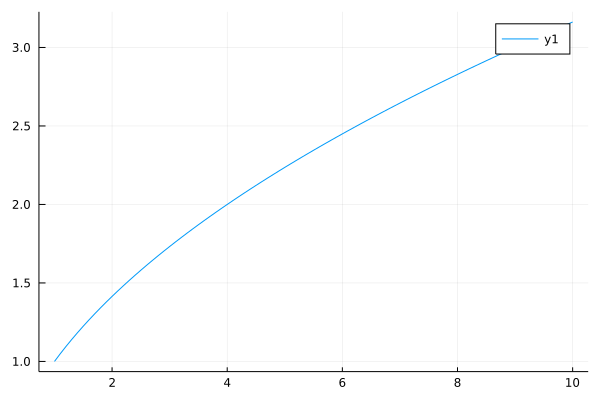

In [75]:
plot(x, y)

In [76]:
y1 = log.(x);

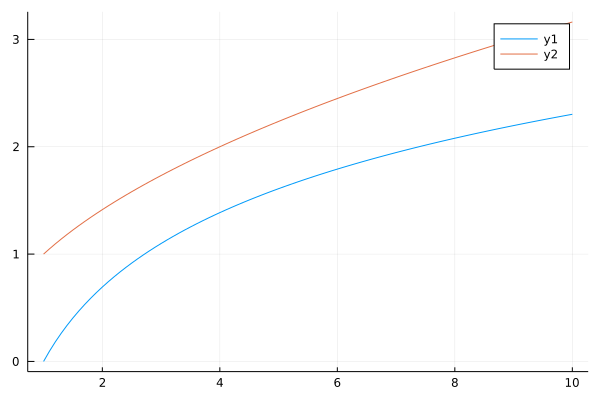

In [77]:
plot(x, y1)
plot!(x, y)

In [78]:
0.01 <approx> 0.0349

LoadError: UndefVarError: approx not defined